This notebook will focus on the shot/play comparison of All-Star calibre players to league-average players.

For the All-Star scoring versus league average scoring comparison, we have used all-star data acquired from Hockey Reference to name all the all stars from 2011-2025, using the data we will find the top 10 most occuring all stars and feature them in our analysis of all stars. Below is the code to clean the initial all-star data to filter it so we can merge it into our player_info table to acquire the player_ids for all our featured players

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sportypy


player_data = pd.read_pickle("pickled_data/player_info")
plays_data = pd.read_pickle("pickled_data/game_plays")
plays_players_data = pd.read_pickle("pickled_data/game_plays_players")
player_info = pd.read_pickle("pickled_data/player_info")

allstar_data = pd.read_csv("data/allstars.csv")

allstar_data = allstar_data.iloc[:, [0]]
allstar_data.columns = ['fullName']

allstar_data[['firstName', 'lastName']] = allstar_data['fullName'].str.rsplit(n=1, expand=True)

top_10_players = allstar_data['fullName'].value_counts().head(11).index.tolist()

filtered_allstar_df = allstar_data[allstar_data['fullName'].isin(top_10_players)]

filtered_allstar_df = filtered_allstar_df.drop_duplicates(subset='fullName')

display(filtered_allstar_df)

merged_allstar = filtered_allstar_df.merge(player_info, on='fullName', how='left')

display(merged_allstar)





,fullName,firstName,lastName
36,Nathan MacKinnon,Nathan,MacKinnon
46,Claude Giroux,Claude,Giroux
51,Alex Ovechkin,Alex,Ovechkin
86,Shea Weber,Shea,Weber
95,Kris Letang,Kris,Letang
101,Patrick Kane,Patrick,Kane
110,Brent Burns,Brent,Burns
123,Erik Karlsson,Erik,Karlsson
128,Carey Price,Carey,Price
129,Steven Stamkos,Steven,Stamkos


,fullName,firstName_x,lastName_x,player_id,firstName_y,lastName_y,nationality,birthCity,primaryPosition,birthDate,birthStateProvince,height,height_cm,weight,shootsCatches,allStarSeasons
0,Nathan MacKinnon,Nathan,MacKinnon,8477492,Nathan,MacKinnon,CAN,Halifax,C,1995-09-01 01:00:00,NS,"6' 0""",182.88,205.0,R,"[20162017, 20172018, 20182019, 20192020]"
1,Claude Giroux,Claude,Giroux,8473512,Claude,Giroux,CAN,Hearst,C,1988-01-12 00:00:00,ON,"5' 11""",180.34,185.0,R,"[20142015, 20152016, 20102011, 20112012, 20172..."
2,Alex Ovechkin,Alex,Ovechkin,8471214,Alex,Ovechkin,RUS,Moscow,LW,1985-09-17 01:00:00,NaN,"6' 3""",190.50,235.0,R,"[20142015, 20062007, 20072008, 20082009, 20102..."
3,Shea Weber,Shea,Weber,8470642,Shea,Weber,CAN,Sicamous,D,1985-08-14 01:00:00,BC,"6' 4""",193.04,230.0,R,"[20142015, 20152016, 20082009, 20102011, 20112..."
4,Kris Letang,Kris,Letang,8471724,Kris,Letang,CAN,Montreal,D,1987-04-24 01:00:00,QC,"6' 0""",182.88,201.0,R,"[20152016, 20102011, 20112012, 20172018, 20182..."
5,Patrick Kane,Patrick,Kane,8474141,Patrick,Kane,USA,Buffalo,RW,1988-11-19 00:00:00,NY,"5' 11""",180.34,177.0,L,"[20142015, 20152016, 20082009, 20102011, 20112..."
6,Brent Burns,Brent,Burns,8470613,Brent,Burns,CAN,Barrie,D,1985-03-09 00:00:00,ON,"6' 5""",195.58,230.0,R,"[20142015, 20152016, 20102011, 20162017, 20172..."
7,Erik Karlsson,Erik,Karlsson,8474578,Erik,Karlsson,SWE,Landsbro,D,1990-05-31 01:00:00,NaN,"6' 0""",182.88,191.0,R,"[20152016, 20102011, 20112012, 20162017, 20172..."
8,Carey Price,Carey,Price,8471679,Carey,Price,CAN,Anahim Lake,G,1987-08-16 01:00:00,BC,"6' 3""",190.50,215.0,L,"[20142015, 20082009, 20102011, 20112012, 20162..."
9,Steven Stamkos,Steven,Stamkos,8474564,Steven,Stamkos,CAN,Markham,C,1990-02-07 00:00:00,ON,"6' 1""",185.42,194.0,R,"[20142015, 20152016, 20102011, 20112012, 20172..."


From the code above we have a list of 11 players (Had to add one because one of the players is a goalie) that we will focus on for our analysis. 

We have merged the filtered all stars data-frame with the player info dataframe, acquiring the player_id's for the game plays. 

We can now filter game plays based on each player for their own shooting visualizations

In [48]:
for lastName_x, player_id in zip(merged_allstar['lastName_x'], merged_allstar['player_id']):
    exec(f"{lastName_x}_id = {player_id}")

ovie_plays = plays_players_data[plays_players_data['player_id'] == Ovechkin_id]

kane_plays = plays_players_data[plays_players_data['player_id'] == Kane_id]

weber_plays = plays_players_data[plays_players_data['player_id'] == Weber_id]

mackinnon_plays = plays_players_data[plays_players_data['player_id'] == MacKinnon_id]

giroux_plays = plays_players_data[plays_players_data['player_id'] == Giroux_id]

letang_plays = plays_players_data[plays_players_data['player_id'] == Letang_id]

karlsson_plays = plays_players_data[plays_players_data['player_id'] == Karlsson_id]

stamkos_plays = plays_players_data[plays_players_data['player_id'] == Stamkos_id]

tavares_plays = plays_players_data[plays_players_data['player_id'] == Tavares_id]

burns_plays = plays_players_data[plays_players_data['player_id'] == Burns_id]

ovie2 = pd.merge(ovie_plays, plays_data, on='play_id')

kane2 = pd.merge(kane_plays, plays_data, on='play_id')

weber2 = pd.merge(weber_plays, plays_data, on='play_id')

mackinnon2 = pd.merge(mackinnon_plays, plays_data, on='play_id')

giroux2 = pd.merge(giroux_plays, plays_data, on='play_id')

letang2 = pd.merge(letang_plays, plays_data, on='play_id')

karlsson2 = pd.merge(karlsson_plays, plays_data, on='play_id')

stamkos2 = pd.merge(stamkos_plays, plays_data, on='play_id')

tavares2 = pd.merge(tavares_plays, plays_data, on='play_id')

burns2 = pd.merge(burns_plays, plays_data, on='play_id')



Above we have filtered the all-star data with respect to their player_id, we then all the plays under each player id and separated them by player, this will help us clear up visualizations, as it would be too crowded with all ten players on one graph. 

Now, we have to filter the data further by looking at shooting and scoring, as we are primarily focused on the offensive side of play.

In [49]:
ovie2 = ovie2[(ovie2['playerType'] == 'Shooter') | (ovie2['playerType'] == 'Scorer')]

letang2 = letang2[(letang2['playerType'] == 'Shooter') | (letang2['playerType'] == 'Scorer')]

kane2 = kane2[(kane2['playerType'] == 'Shooter') | (kane2['playerType'] == 'Scorer')]

weber2 = weber2[(weber2['playerType'] == 'Shooter') | (weber2['playerType'] == 'Scorer')]

mackinnon2 = mackinnon2[(mackinnon2['playerType'] == 'Shooter') | (mackinnon2['playerType'] == 'Scorer')]

tavares2 = tavares2[(tavares2['playerType'] == 'Shooter') | (tavares2['playerType'] == 'Scorer')]

giroux2 = giroux2[(giroux2['playerType'] == 'Shooter') | (giroux2['playerType'] == 'Scorer')]

burns2 = burns2[(burns2['playerType'] == 'Shooter') | (burns2['playerType'] == 'Scorer')]

stamkos2 = stamkos2[(stamkos2['playerType'] == 'Shooter') | (stamkos2['playerType'] == 'Scorer')]

karlsson2 = karlsson2[(karlsson2['playerType'] == 'Shooter') | (karlsson2['playerType'] == 'Scorer')]

ovie3 = ovie2.drop_duplicates()

letang3 = letang2.drop_duplicates()

kane3 = kane2.drop_duplicates()

weber3 = weber2.drop_duplicates()

mackinnon3 = mackinnon2.drop_duplicates()

tavares3 = tavares2.drop_duplicates()

giroux3 = giroux2.drop_duplicates()

burns3 = burns2.drop_duplicates()

stamkos3 = stamkos2.drop_duplicates()

karlsson3 = karlsson2.drop_duplicates()

ovieshots = ovie3[ovie3['event'].isin(['Shot', 'Goal'])][['event', 'secondaryType', 'st_x', 'st_y', 'period']]

letangshots = letang3[letang3['event'].isin(['Shot', 'Goal'])][['event', 'secondaryType', 'st_x', 'st_y', 'period']]

kaneshots = kane3[kane3['event'].isin(['Shot', 'Goal'])][['event', 'secondaryType', 'st_x', 'st_y', 'period']]

webershots = weber3[weber3['event'].isin(['Shot', 'Goal'])][['event', 'secondaryType', 'st_x', 'st_y', 'period']]

mackinnonshots = mackinnon3[mackinnon3['event'].isin(['Shot', 'Goal'])][['event', 'secondaryType', 'st_x', 'st_y', 'period']]

tavaresshots = tavares3[tavares3['event'].isin(['Shot', 'Goal'])][['event', 'secondaryType', 'st_x', 'st_y', 'period']]

girouxshots = giroux3[giroux3['event'].isin(['Shot', 'Goal'])][['event', 'secondaryType', 'st_x', 'st_y', 'period']]

burnsshots = burns3[burns3['event'].isin(['Shot', 'Goal'])][['event', 'secondaryType', 'st_x', 'st_y', 'period']]

stamkosshots = stamkos3[stamkos3['event'].isin(['Shot', 'Goal'])][['event', 'secondaryType', 'st_x', 'st_y', 'period']]

karlssonshots = karlsson3[karlsson3['event'].isin(['Shot', 'Goal'])][['event', 'secondaryType', 'st_x', 'st_y', 'period']]


Now above we have all the top 10 players shot data, with the type of shot and where on the ice they were when they took the shot/scored the goal. We can now use this data to visualize the shot attempts in scatter plots. 

In [50]:
from matplotlib.patches import Arc, Wedge
def draw_rink(ax):
    '''
    Displays a hockey rink with NHL dimensions at current axes
    Parameter ax: Current axes
    Returns nothing
    '''

    # Draw the center ice line
    ax.axvline(0, color='red', linestyle='-', linewidth=2, alpha=0.5)
    
    # Draw the blue lines at +/- 25 feet from center ice
    ax.axvline(-25, color='blue', linestyle='--', linewidth=2, alpha=0.5)
    ax.axvline(25, color='blue', linestyle='--', linewidth=2, alpha=0.5)

    # Draw blue faceoff circle at center ice (15 ft radius) with blue dot at the center
    center_circle = plt.Circle((0, 0), 15, edgecolor='blue', facecolor='none', alpha = 0.5, lw=2)
    ax.add_patch(center_circle)
    ax.plot(0, 0, marker='o', color='blue', alpha = 0.5, markersize=6)  
    
    # Draw the 4 red faceoff circles with red dots at center (31 feet from end boards and 20.5 feet from side boards)
    faceoff_positions = [(69, 20.5), (-69, 20.5), (69, -20.5), (-69, -20.5)]
    for x, y in faceoff_positions:
        faceoff_circle = plt.Circle((x, y), 15, edgecolor='red', facecolor='none', alpha = 0.5, lw=2)
        ax.add_patch(faceoff_circle)
        ax.plot(x, y, marker='o', color='red', alpha = 0.5, markersize=6)  
    
    # Draw goal lines for net (6 ft)
    ax.plot([-89, -89], [-3, 3], color='red', lw=1)  # Left goal line
    ax.plot([89, 89], [-3, 3], color='red', lw=1)    # Right goal line

    # Draw back of goals as arcs (6 ft wide and 4 ft deep)
    left_goal= Arc((-89, 0), width=6, height=8, angle=90, theta1=360, theta2=180, color='red', lw=1)
    right_goal = Arc((89, 0), width=6, height=8, angle=90, theta1=180, theta2=360, color='red', lw=1)

    ax.add_patch(left_goal)
    ax.add_patch(right_goal)

    # Draw the goal creases using Wedges and fill with low opacity (6 ft radius)
    left_goal_crease = Wedge((-89, 0), r=6, theta1=270, theta2=90, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)
    right_goal_crease = Wedge((89, 0), r=6, theta1=90, theta2=270, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)

    ax.add_patch(left_goal_crease)
    ax.add_patch(right_goal_crease)

    # Set the rink bounds (200 ft by 85 ft)
    ax.set_xlim(-100, 100)        
    ax.set_ylim(-42.5, 42.5)

    # Treat x and y units equally so circles are drawn correctly
    ax.set_aspect('equal')

/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_19493/1157499183.py:40: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  left_goal_crease = Wedge((-89, 0), r=6, theta1=270, theta2=90, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)
/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_19493/1157499183.py:41: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  right_goal_crease = Wedge((89, 0), r=6, theta1=90, theta2=270, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)


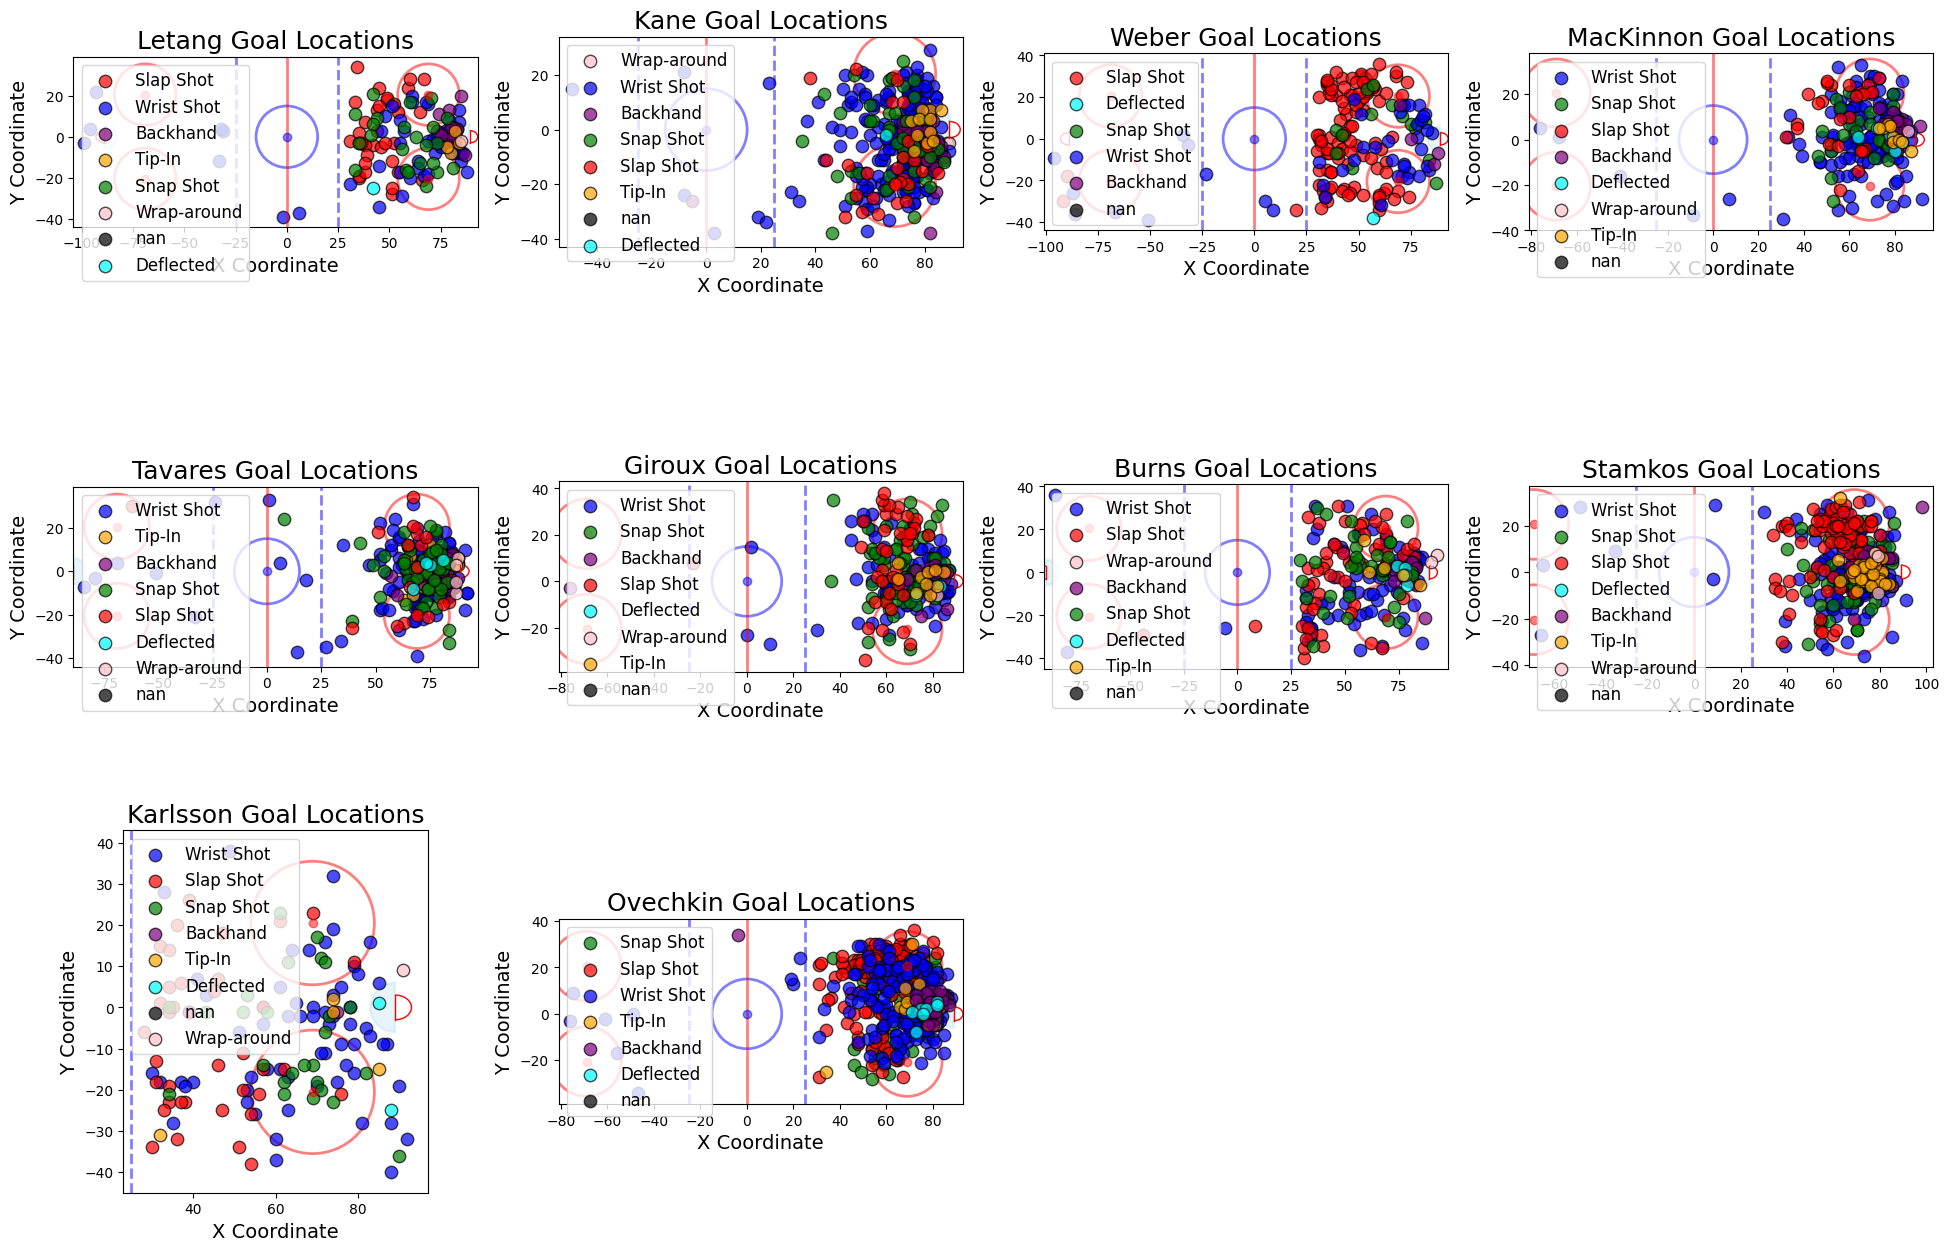

In [51]:
players = {
    "Letang": letangshots, "Kane": kaneshots, "Weber": webershots, "MacKinnon": mackinnonshots,
    "Tavares": tavaresshots, "Giroux": girouxshots, "Burns": burnsshots, "Stamkos": stamkosshots, "Karlsson": karlssonshots, "Ovechkin": ovieshots
}

fig, axes = plt.subplots(3, 4, figsize=(24,16))

axes = axes.flatten()

shot_colors = {
    "Wrist Shot": "blue",
    "Slap Shot": "red",
    "Snap Shot": "green",
    "Backhand": "purple",
    "Tip-In": "orange",
    "Deflected": "cyan",
    "Wrap-around": "pink",
    "Unknown": "gray"
}

for i, (player, df) in enumerate(players.items()):
    ax = axes[i]
    filtered_df = df[df['event'].isin(['Goal'])]
    draw_rink(ax)
    unique_shot_types = filtered_df['secondaryType'].unique() 

    for shot_type in unique_shot_types:
        subset = filtered_df[filtered_df['secondaryType'] == shot_type]
        color = shot_colors.get(shot_type, "black")  # Default to black if unknown shot type
        ax.scatter(subset['st_x'], subset['st_y'], label=shot_type, s=80, alpha=0.7, c=color, edgecolors="black")

    ax.set_title(f"{player} Goal Locations", fontsize=18)
    ax.set_xlabel("X Coordinate", fontsize=14)
    ax.set_ylabel("Y Coordinate", fontsize=14)
    ax.legend(fontsize=12, loc="upper left")
    ax.set_xlim(filtered_df['st_x'].min() - 5, filtered_df['st_x'].max() + 5)
    ax.set_ylim(filtered_df['st_y'].min() - 5, filtered_df['st_y'].max() + 5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


Looking at the goal graphs, we can infer that each player tended to favor certain types of shots for their goals, mainly specializing in one two signature shots in order to score their goals. For example, in the Shea Weber graph, he tended to favor slap shots over any other type of shots for the majority of goals he scored. The locations are also interesting, as some players tended to stick to one location for their goals, and others were all over the place. Next, we will look more into goal locations for each player using a heatmap. 

/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_19493/1157499183.py:40: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  left_goal_crease = Wedge((-89, 0), r=6, theta1=270, theta2=90, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)
/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_19493/1157499183.py:41: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  right_goal_crease = Wedge((89, 0), r=6, theta1=90, theta2=270, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)
/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_19493/1157499183.py:40: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  left_goal_crease = Wedge((-89, 0), r=6, theta1=270, theta2=90, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)
/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_19493/1157499183.py:41: UserWarning: Setting the 'color'

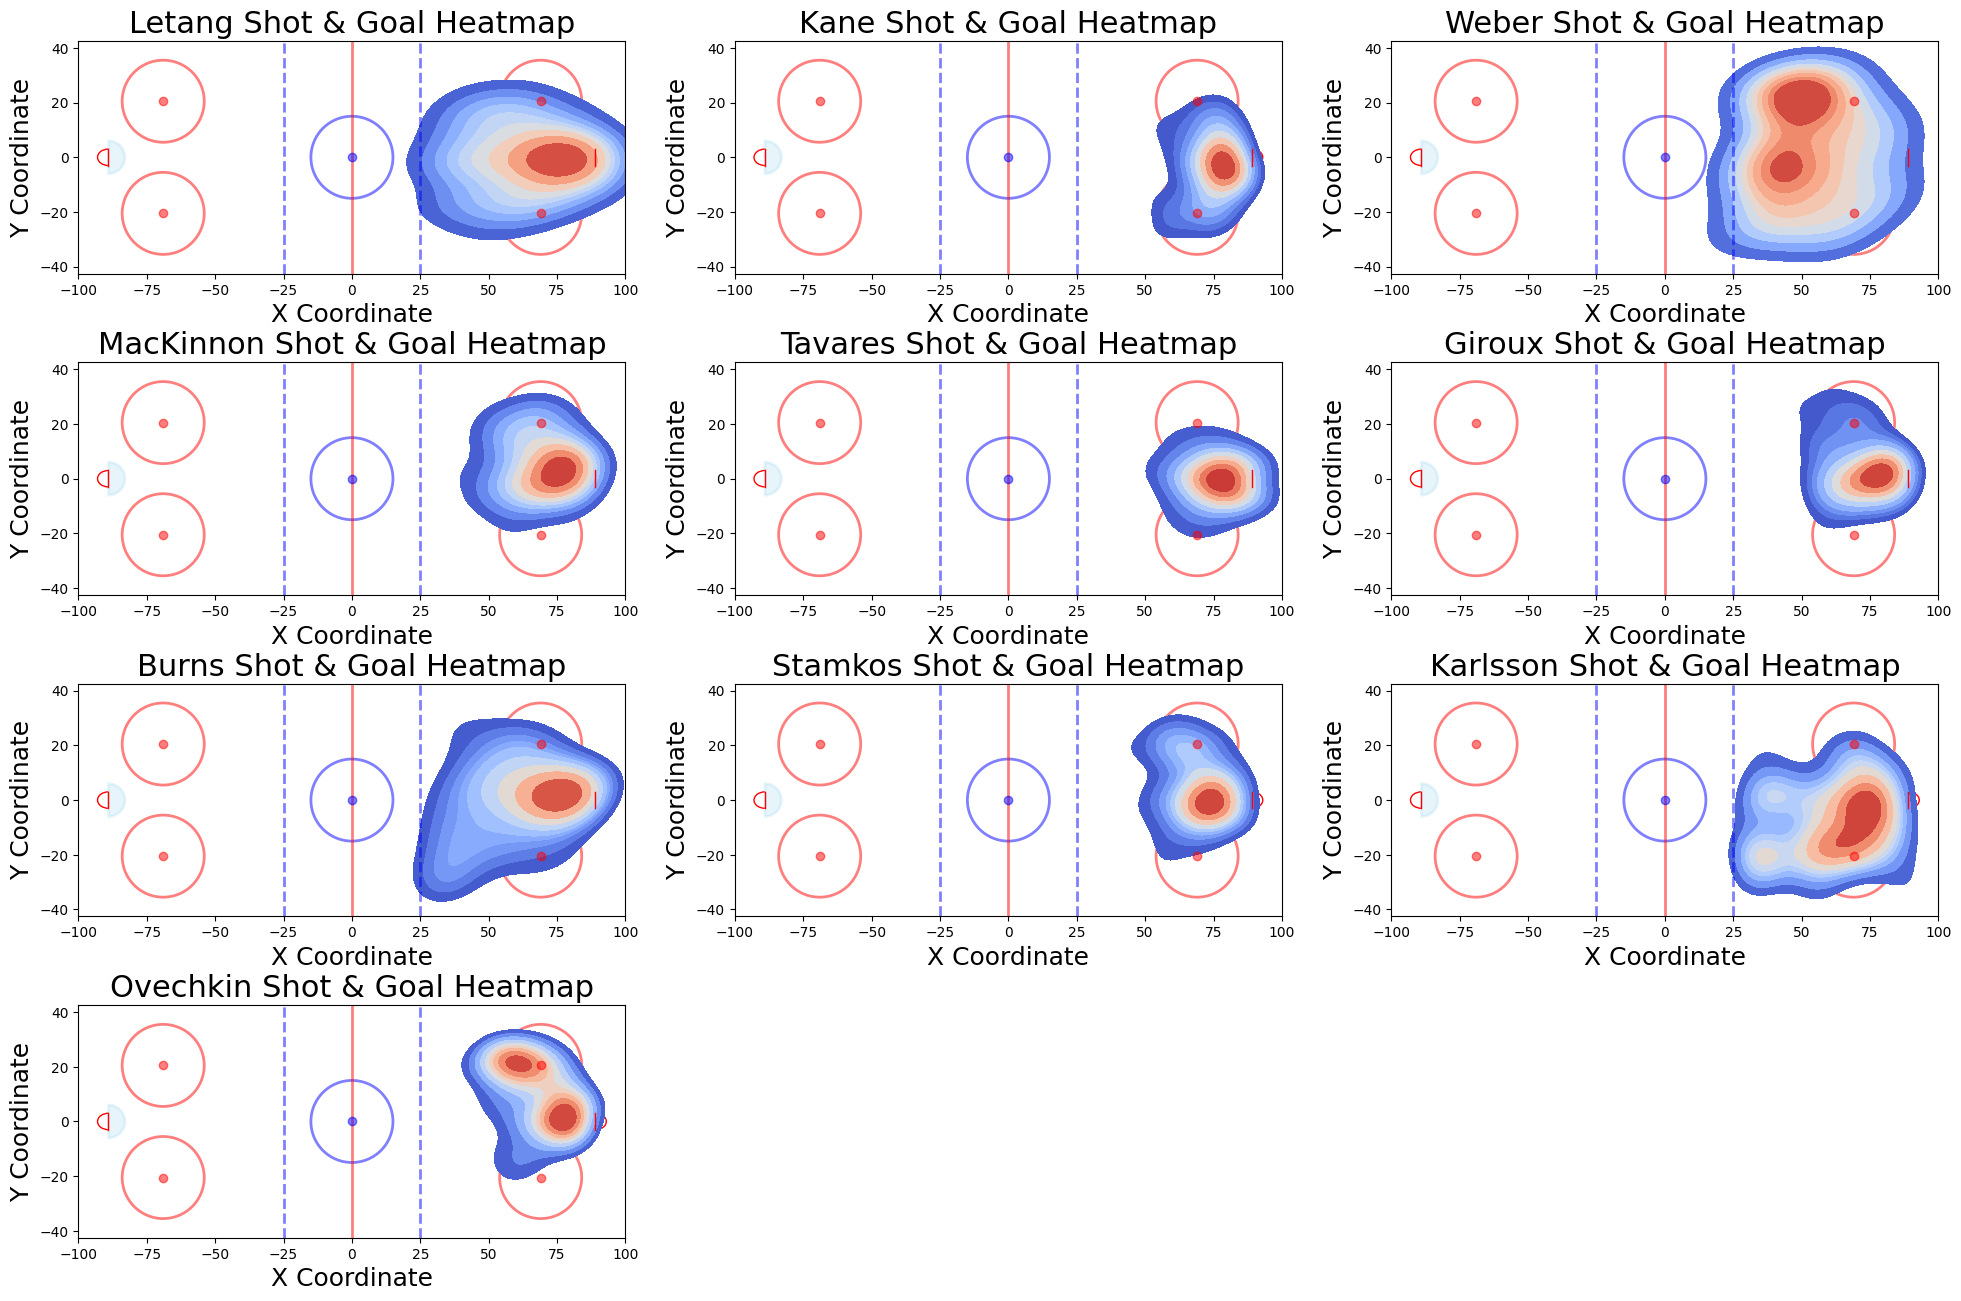

In [52]:
fig, axes = plt.subplots(4, 3, figsize=(24,16))

axes = axes.flatten()

for i, (player, df) in enumerate(players.items()):

    ax = axes[i]

    draw_rink(ax)

    filtered_df = df[df['event'].isin(['Goal'])]

    sns.kdeplot(
        x ='st_x', y = 'st_y', data=filtered_df, thresh=0.2, fill=True, cmap='coolwarm', ax=ax)
    
    ax.set_title(f"{player} Shot & Goal Heatmap", fontsize=22)  # Bigger title font
    ax.set_xlabel("X Coordinate", fontsize=18)  # Bigger axis labels
    ax.set_ylabel("Y Coordinate", fontsize=18)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.show()

The heatmaps above show key information for how all-stars tend to favor certain locations on the ice for all of their goals. For example, Alexander Ovechkin primarily scored goals in the left circle, and Shea Weber also had most of his goals scored in the bottom of the left circle in 2 primary locations. 

In [53]:
players = {
    "Letang": letangshots, "Kane": kaneshots, "Weber": webershots, "MacKinnon": mackinnonshots,
    "Tavares": tavaresshots, "Giroux": girouxshots, "Burns": burnsshots, "Stamkos": stamkosshots, "Karlsson": karlssonshots, "Ovechkin": ovieshots
}



for player, df in players.items():
    most_common_shot = df['secondaryType'].value_counts().idxmax()
    shot_count = df['secondaryType'].value_counts().max()
    print(f"{player}: {most_common_shot} ({shot_count} times)")

Letang: Wrist Shot (904 times)
Kane: Wrist Shot (1849 times)
Weber: Slap Shot (1019 times)
MacKinnon: Wrist Shot (1290 times)
Tavares: Wrist Shot (1457 times)
Giroux: Wrist Shot (1167 times)
Burns: Wrist Shot (1207 times)
Stamkos: Wrist Shot (1007 times)
Karlsson: Wrist Shot (1042 times)
Ovechkin: Wrist Shot (1738 times)


We see that every sampled all-star uses the wrist shot the most. One reason is that the wrist shot is already the most common shot taken by all players. 

Another important comparison metric is looking at the distribution of goals scored during the game, we need to separate the goal totals by period to see if all-stars are showing up in the right times to win games. Below, we will implement a bar graph to see the goal scoring distribution by period. 

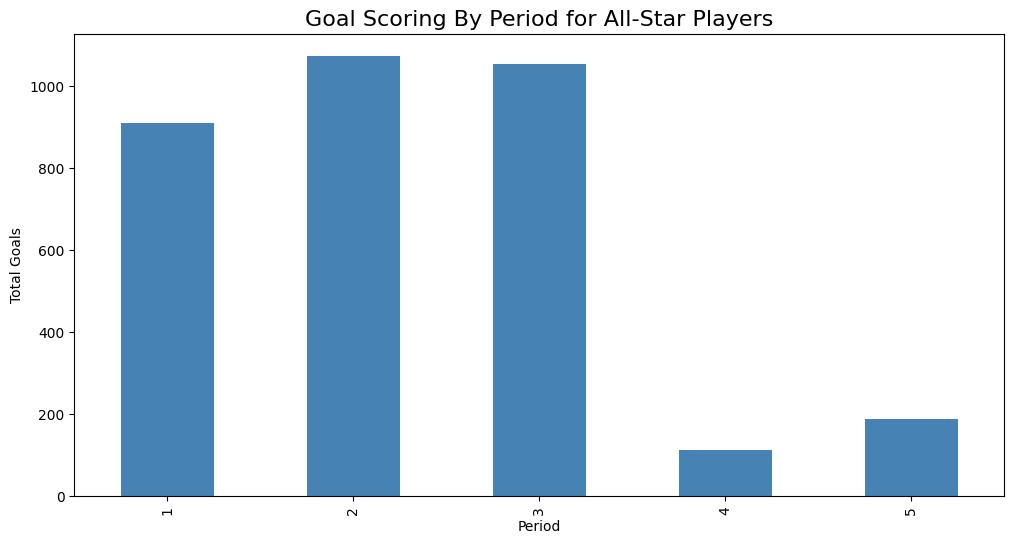

In [63]:
goal_data = pd.concat(players.values(), ignore_index=True)

goal_data = goal_data[goal_data['event'] == 'Goal']

goal_counts = goal_data['period'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12,6))
goal_counts.plot(kind='bar', color='steelblue', ax=ax)

ax.set_title('Goal Scoring By Period for All-Star Players', fontsize=16)
ax.set_ylabel('Total Goals')
ax.set_xlabel('Period')
plt.show()

We see from the bar graph above all-stars are scoring goals the most in the second and third period. This matches what we would initially expect as above average players see more icetime in the later periods of the game especially if they are losing. We should also look at shots taken by period as well, as this is correlated to the playing time of all-stars per period of the game. 

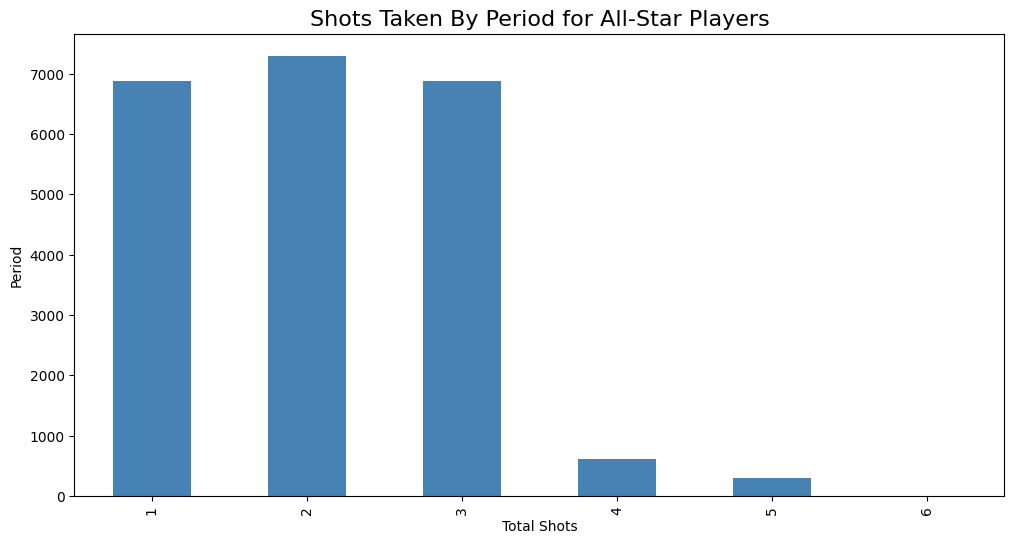

In [55]:
shot_data = pd.concat(players.values(), ignore_index=True)

shot_data = shot_data[shot_data['event'] == 'Shot']

shot_counts = shot_data['period'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12,6))
shot_counts.plot(kind='bar', color='steelblue', ax=ax)

ax.set_title('Shots Taken By Period for All-Star Players', fontsize=16)
ax.set_ylabel('Period')
ax.set_xlabel("Total Shots")
plt.show()

Finally, we want to analyze the shot to goal ratio for All-Stars, this ratio would tell us how many goals are scored from shots taken, an important metric for evaluating All-Star performances. It is also important to see the amount of total shots from our all-star selection, as this plays a big role in quality of shots that actually turn into goals. 

In [56]:
shot_goal_data = pd.concat(players.values(), ignore_index=True)

total_shots = shot_goal_data[shot_goal_data['event'] == 'Shot'].shape[0]
total_goals = shot_goal_data[shot_goal_data['event'] == 'Goal'].shape[0]

shot_goal_ratio = total_goals / total_shots

display(round(shot_goal_ratio,3) * 100)
print("Total Shots:", total_shots)

15.2

Total Shots: 21943


This result is interesting because the all-stars actually have a lower shot to goal ratio compared to the league-average players. One reason could be that the total shots are much higher than the sampled league-average, leading to bias on the lower amount of shots. 

The last visualization that we want to produce is the K-Means clustering visual to show the position of goals in clusters on the ice to show us where the key areas of scoring is versus league-average. We will use the sklearn library to effectively cluster our goals. 

/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_19493/1157499183.py:40: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  left_goal_crease = Wedge((-89, 0), r=6, theta1=270, theta2=90, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)
/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_19493/1157499183.py:41: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  right_goal_crease = Wedge((89, 0), r=6, theta1=90, theta2=270, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)


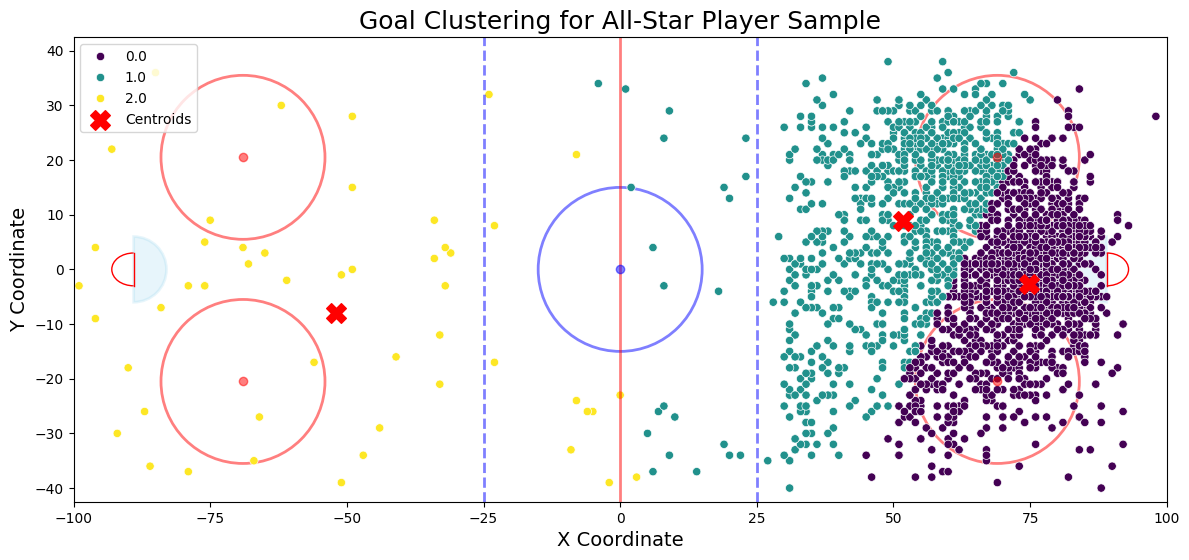

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd

num_clusters = 3  #We want to see the top 3 cluster areas for goals
all_star_shot_data = pd.concat(players.values(), ignore_index=True)
all_star_shot_locations = all_star_shot_data[all_star_shot_data['event'].isin(['Goal'])][['st_x', 'st_y']].dropna().copy()
# Apply K-Means Clustering
kmeans_all_star = KMeans(n_clusters=num_clusters, random_state=1) # Keep Random State set for reproductability
kmeans_all_star.fit(all_star_shot_locations)
# Assign cluster labels back to the original DataFrame (only to non-null rows)
all_star_shot_data.loc[all_star_shot_locations.index, 'Cluster'] = kmeans_all_star.labels_

# Create visual for All-Star shot clustering

fig, ax = plt.subplots(figsize=(12, 8))
draw_rink(ax)

# Scatter plot of All-Star shot clusters
sns.scatterplot(x=all_star_shot_data['st_x'], y=all_star_shot_data['st_y'], 
                hue=all_star_shot_data['Cluster'], palette='viridis', ax=ax)

# Mark cluster centroids
ax.scatter(kmeans_all_star.cluster_centers_[:, 0], kmeans_all_star.cluster_centers_[:, 1], 
           color='red', marker='X', s=200, label='Centroids')

# Set plot title and labels
ax.set_title("Goal Clustering for All-Star Player Sample", fontsize=18)
ax.set_xlabel("X Coordinate", fontsize=14)
ax.set_ylabel("Y Coordinate", fontsize=14)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()





The clustering visual is very different from the league-average, where the third cluster is actually from their own end of the ice. These goals in the cluster are all empty net goals from the end of the game. This would make sense because in the last minutes of the game, a team normally puts out their best players to defend and try to score on the empty net 6v5. 